# Case Study 1 - Numpy, Pandas, Matplotlib

#### Final Approach:- 
#### 1)Which city had highest number of sales?
#### 2)Highest selling products. Which products are sold the most?

### Importing  library and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Sales.csv")

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
df.shape

(9723, 6)

In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


#### Converting the 'Price Each' column to numeric data type

In [6]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
print(df['Price Each'].dtype)

float64


#### Converting the 'Quantity Ordered' column to numeric data type

In [7]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
print(df['Quantity Ordered'].dtype)


float64


#### Calculating the total sales for each product

In [8]:
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']
product_sales = df.groupby('Product')['Total Sales'].sum().reset_index(name='Total Sales')

#### Plotting a bar chart to visualize the total sales for each product

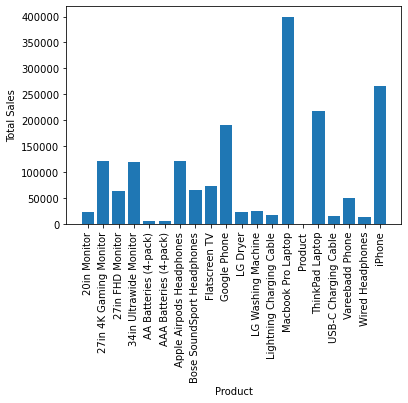

In [9]:
plt.bar(product_sales['Product'], product_sales['Total Sales'])
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

#### Calculating the total sales for each city

In [10]:
df['City'] = df[df['Purchase Address'].notnull()]['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) >= 2 else np.nan)
city_sales = df.groupby('City')['Total Sales'].sum().reset_index(name='Total Sales')

#### Plotting a bar chart to visualize the total sales for each city

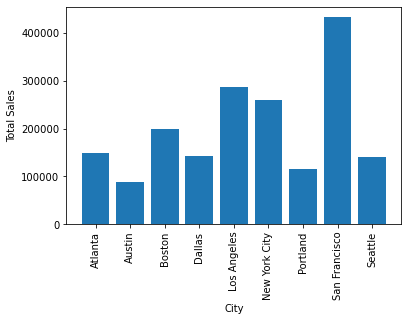

In [11]:
plt.bar(city_sales['City'], city_sales['Total Sales'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

In [12]:
clean_df = df.dropna()

#### convert columns to appropriate data types

In [13]:
clean_df['Price Each'] = pd.to_numeric(clean_df['Price Each'])
clean_df['Quantity Ordered'] = pd.to_numeric(clean_df['Quantity Ordered'])

#### calculate sales

In [14]:
clean_df['Total Sales'] = clean_df['Price Each'] * clean_df['Quantity Ordered']

#### calculate average sales by product

In [15]:
avg_sales = clean_df.groupby('Product')['Total Sales'].mean().reset_index(name='Average Sales')

#### Plotting a bar chart to visualize the average sales for each product

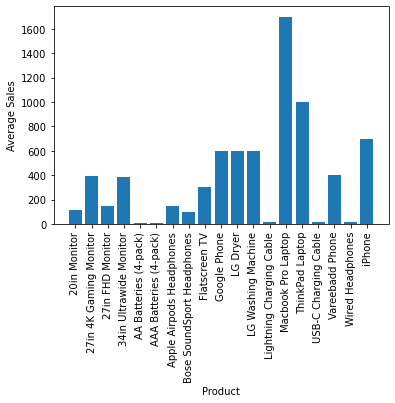

In [16]:
plt.bar(avg_sales['Product'], avg_sales['Average Sales'])
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.show()

## Based on the analysis, the city with the highest number of sales is San Francisco, and the highest demand product is the Macbook Pro Laptop.